# CPSC-483 Project 2: Polynomial Regression
## FA 2021 - Section 02
### Armanul Ambia, Iftekharul Islam

### __Experiment 1__ : Use numpy.load() to load the dataset and examine the contents of the first few rows.

In [15]:
import numpy as np
data = np.loadtxt('dataset.csv', skiprows=1, delimiter =',')
print(f"There are {len(data)} values in the dataset")
for x in range (5):
    print(f"Data in row {x}: {data[x]}")

There are 1000 values in the dataset
Data in row 0: [-0.59828843  0.46192254 -1.34862803]
Data in row 1: [-1.74575782 -1.41239652  1.67154097]
Data in row 2: [-1.16639696 -0.06900688 -1.99250735]
Data in row 3: [-0.86156208 -1.6482701   1.39107574]
Data in row 4: [-3.76750436 -1.79155834  0.448392  ]


From initializing the data, we produced a numpy array (np.ndarray) that contains 1000 subarrays. Each of these subarrays serves as an example and in total there are 1000 examples in the dataset.

### __Experiment 2__ : Set aside 10% of the data as a test set, with the remaining data for training and validation.

In [16]:
# assuming 10% of 1000 = 100, We will slice the data and store 900 values in training set and 100 values in test set.
test_set = data[900:]
training_set = data[0:900]
print(f"Length of training set: {len(training_set)}")
print(f"Length of test set: {len(test_set)}")

Length of training set: 900
Length of test set: 100


In this experiment, the last 100 values of the dataset is stored as the test set and the first 900 values are stored as the training set. This method will be effective since the examples are not sorted in any specific way and it should not affect our cross validation process.

### Experiment 3: Fit a linear model to the training data and find the equation for $y$ as a function of $x_1$ and $x_2$.

In [17]:
x_1 = training_set[:,0][:,None]
x_2 = training_set[:,1][:,None]
y = training_set[:,2][:,None]
# create a matrix, using the columns of x_1, and x_2 with row format { 1, x_1, x_2}
X = np.hstack((np.ones_like(x_2),x_1,x_2))
# y is already the target vector
t = y
XX = np.dot(X.T,X)
invXX = np.linalg.inv(XX)
Xt = np.dot(X.T,t)
w = np.dot(invXX,Xt)
print("Weights:\n", w)

Weights:
 [[0.69333661]
 [0.03664626]
 [0.02839225]]


In this experiment, we used the method shown in our linear regression notes that computes the weights vector using the following formula:

$$ \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

where the $X$ matrix is defined as:

$$ X = [\vec{1}, \vec{x_{1}}, \vec{x_{2}}] $$

*** $\vec{1}$ refers to a column vector where each value is 1.

The equation for $y$ as a function of $x_1$ and $x_2$ can be written by taking the dot product of $w$ and the input vector as:

$$y = 0.6933 + 0.0366x_1 + 0.0284x_2$$

### __Experiment 4__: Use the value of $\vec{w}$ you found to compute the predicted response for each value in the training data, then compute the average loss $𝓛$ for the model on this data.

In [18]:
prediction_set = []
for x in range(len(training_set)):
    prediction_set.append(w[0][0] +
                          w[1][0]*x_1[x][0] +
                          w[2][0]*x_2[x][0])

sum = 0
for x in range(len(prediction_set)):
    sum += (t[x][0] - prediction_set[x])**2
avg_abs_error = sum/len(prediction_set)
print(f"Average Absolute Error: {avg_abs_error}")
print(f"Range of target values: {min(t)} to {max(t)}")

Average Absolute Error: 8.59333583918492
Range of target values: [-9.32940393] to [8.75134039]


This code creates an array of all the prediction values, then finds average squared loss using the following formula:

$$ 𝓛 = \frac{1}{N}\sum_{n=1}^N (t_n - (w_0 + w_1x_1 + w_2x_2))^2 $$

Our average loss was found to be 8.5933 for a linear model. By examining the range of target values, we find that the minimum value is -9.3294 and the maximum value is 8.7513, this means that the average loss for the linear model is almost half the range of values and is significantly high. Further examination is needed with higher complexities to find a better model.

### Experiment 5: Add quadratic features to your training data, then fit a quadratic model. What is the equation for this model? What is this model’s training MSE?

In [19]:
# create new Example matrix with 1, x_1, x_2, x_1 squared, x_2 squared
X1 = np.hstack((np.ones_like(x_1),x_1,x_2, x_1**2, x_2**2))
# solve linear system - shown in notes
w1 = np.dot(np.linalg.inv(np.dot(X1.T,X1)),np.dot(X1.T,t))
# show weights
print("New weights:\n", w1)

prediction_set = []
for x in range(len(training_set)):
    prediction_set.append(w1[0][0] +
                          w1[1][0]*x_1[x][0] +
                          w1[2][0]*x_2[x][0] +
                          w1[3][0]*(x_1[x][0]**2) +
                          w1[4][0]*(x_2[x][0]**2))

sum = 0
for x in range(len(prediction_set)):
    sum += (t[x][0] - prediction_set[x]) ** 2
MSE = sum/len(training_set)
print(f"\nQuadratic Model Training MSE: {MSE}")

New weights:
 [[0.61472518]
 [0.03564374]
 [0.03013081]
 [0.02423326]
 [0.00411616]]

Quadratic Model Training MSE: 8.58712068806956


To find the weights, we computed the same linear regression equation as Experiment 3:

$$ \mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

However, in this experiment the $X$ matrix is defined as:

$$ X = [\vec{1}, \vec{x_{1}}, \vec{x_{2}}, \vec{x_{1}}^2, \vec{x_{2}}^2] $$

*** $\vec{x_{n}}^2$ is referring to a column vector where each value is equal to $x_{n}^2$

This results in the following equation:

$$y = 0.6147 + 0.0356x_1 + 0.0301x_2 + 0.0242x_1^2 + 0.0041x_2^2$$


After following the Average Squared Loss equation, the quadratic MSE was found to be 8.58712. From this we can see that quadratic model fits the data a little better than the linear model but still not by much. Neither model so far seems to be a good fit for the data when considering the ranges of the target values.

### Experiment 6: Use the test data you set aside in Experiment 2 to compute test MSE values for the linear and quadratic models you created in Experiments 4 and 5.

In [20]:
x_1_test = test_set[:,0][:,None]
x_2_test = test_set[:,1][:,None]
t_test = test_set[:,2][:,None]

# compute linear test MSE using w
prediction_set = []
for x in range(len(test_set)):    
    prediction_set.append(w[0][0] 
                          + w[1][0]*x_1_test[x][0] 
                          + w[2][0]*x_2_test[x][0])

sum = 0
for x in range(len(prediction_set)):
    sum += (t_test[x][0] - prediction_set[x]) ** 2
linear_test_MSE = sum/len(test_set)

# compute quadratic test MSE using w1
prediction_set = []
for x in range(len(test_set)):    
    prediction_set.append(w1[0][0] 
                          + w1[1][0]*x_1_test[x][0] 
                          + w1[2][0]*x_2_test[x][0] 
                          + w1[3][0]*(x_1_test[x][0]**2) 
                          + w1[4][0]*(x_2_test[x][0]**2))
sum = 0
for x in range(len(prediction_set)):
    sum += ((t_test[x][0] - prediction_set[x]) ** 2)
quad_test_MSE = sum/len(test_set)

print(f"Linear Test MSE: {linear_test_MSE}")
print(f"Quadratic Test MSE: {quad_test_MSE}")

Linear Test MSE: 7.935256784533437
Quadratic Test MSE: 7.882170673013783


Similar equations from Experiments 4 and 5 were used to compute the linear and quadratic test MSE values. As with our training MSE values, the quadratic performed slightly better than the linear model. The quadratic model had a test MSE of 7.88217 while the linear model had a test MSE of 7.99036. It's also interesting that our test MSE values for both models are lower than the training MSE values. Typically the test MSE values would result in a higher MSE. To investigate further, higher order polynomials must be compared.

### Experiment 7: Use your training data to implement 5-fold cross-validation. Find the average training and validation MSE values for polynomials of order 1 through 8.

In [21]:
weight = w
N = 900
max_order = 8
X = []
X_test = []
K = 5
sizes = np.tile(np.int64(N/float(5)),(1,K))
sizes[0,-1] = sizes[0,-1] + N - sizes.sum()
c_sizes = np.hstack((0,np.cumsum(sizes)))
X = np.ones_like(x_2)
X_test = np.ones_like(x_2_test)
cv_loss = np.zeros((K,max_order+1))
ind_loss = np.zeros((K,max_order+1))
train_loss = np.zeros((K,max_order+1))

for k in range(max_order+1):
    for fold in range(K):
        X_fold = X[c_sizes[fold]:c_sizes[fold+1],:]
        X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        t_fold = t[c_sizes[fold]:c_sizes[fold+1]]
        t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        w = np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,t_train))
        fold_pred = np.dot(X_fold,w)
        cv_loss[fold,k] = ((fold_pred - t_fold)**2).mean()
        ind_pred = np.dot(X_test,w)
        ind_loss[fold,k] = ((ind_pred - t_test)**2).mean()
        train_pred = np.dot(X_train,w)
        train_loss[fold,k] = ((train_pred - t_train)**2).mean()
            
    X = np.hstack((X,x_1**(k+1),x_2**(k+1)))
    X_test = np.hstack((X_test,x_1_test**(k+1),x_2_test**(k+1)))

This code follows the methodology shown in the cross_validation jupyter notebook in Chapter 1. For our training set, there are 900 values. Since we want 5 folds to cross validate, the data will be evenly split into 180 values. Each time the inner loop runs, we are validating a 180 value sector of our data and our training set contains the remaining 720 values. This results in 5 training MSE and validation MSE values for each order of polynomial. The independent training loss is computed using the 100 test data values set aside in Experiment 6. In this experiment, we want to train up to an order of 8. The first cross validation occurs on the following $X$ matrix:

$$ X = [\vec{1}] $$

The next iteration of the outer loop will test the following $X$ matrix:

$$ X = [\vec{1}, \vec{x_{1}}, \vec{x_{2}}] $$

and this will continue to increase in order:

$$ X = [\vec{1}, \vec{x_{1}}, \vec{x_{2}}, \vec{x_{1}}^2, \vec{x_{2}}^2] $$
$$ ... $$
$$ X = [\vec{1}, \vec{x_{1}}, \vec{x_{2}}, \vec{x_{1}}^2, \vec{x_{2}}^2, ...,\vec{x_{1}}^8, \vec{x_{2}}^8] $$

In the next experiment, we will analyze the results.

### __Experiment 8__: Use the data from Experiment 7 to plot a learning curve showing training and cross-validation loss vs. polynomial order. At what point does the model begin to overfit the data?

Text(0, 0.5, 'Mean squared loss')

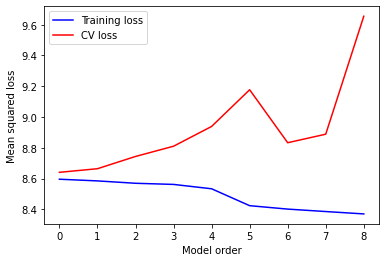

In [22]:
import pylab as plt
%matplotlib inline
order = np.arange(max_order+1)
plt.plot(order,train_loss.mean(axis=0),'b-',label="Training loss")
plt.plot(order,cv_loss.mean(axis=0),'r-',label="CV loss")
# plt.plot(order,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')

From the above plot, we can see the training loss decreases slightly as the complexity increases. This is expected since the data is trained against itself for the training curve and should fit better as more parameters are added. The cross validation (CV) loss curve, however, does not seem to follow a similar model. The plotted model increases significantly as it grows to order 5, and then there is a decrease followed by a sudden increase again. As the order increases, it is expected that the CV loss will increase tremendously since it is highly likely the model is overfitting and will not be able to predict data properly. However, the minimum value for our model occurs at order 0. This means that the lowest CV loss occurs when there are no parameters passed to the $X$ matrix and $X = [\vec{1}]$.

This is not a feasible model and from our previous analysis we can see that the quadratic model did outperform the linear model even if by a small amount. From this information and considering the CV curve continues to increase till order 5, the quadratic model seems to be the ideal model.

### Experiment 9: Use the entire training set to fit the best model given the results of Experiment 8. Find the final test MSE for this model.

Quadratic Model Test MSE: 7.882170673013783


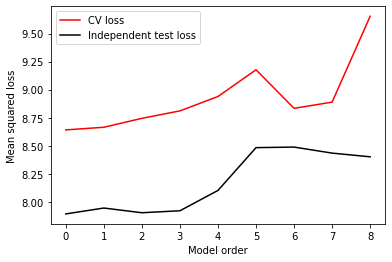

In [23]:
import pylab as plt
%matplotlib inline
order = np.arange(max_order+1)
plt.plot(order,cv_loss.mean(axis=0),'r-',label="CV loss")
plt.plot(order,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')

# quadratic model seems to be ideal from plot so the test MSE calculation will follow the same data as experiment 6

# w1 stores the quadratic weights from training the full data.

# calculate MSE
prediction_set = []
for x in range(len(test_set)):    
    prediction_set.append(w1[0][0] 
                          + w1[1][0]*x_1_test[x][0] 
                          + w1[2][0]*x_2_test[x][0] 
                          + w1[3][0]*(x_1_test[x][0]**2) 
                          + w1[4][0]*(x_2_test[x][0]**2))
sum = 0
for x in range(len(prediction_set)):
    sum += ((t_test[x][0] - prediction_set[x]) ** 2)
quad_test_MSE = sum/len(t_test)
print(f"Quadratic Model Test MSE: {quad_test_MSE}")
plt.show()

A plot is provided of the independent test loss to explain our choice for the optimal model. In the previous experiment, we chose to use the quadratic model based on our CV Loss. When comparing with the Independent Test Loss, it is easier to see that there is a slight minimum at order 2 for the test loss. This is not factored into our training but does indicate that the quadratic model is slightly better than the zero and first order models. It is not clear to see this in the CV Loss curve since the curve is steadily increasing from 0. 

Since the quadratic model seems to be the best model, the equation for the curve is the same as the one derived in Experiment 6.

$$y = 0.6147 + 0.0356x_1 + 0.0301x_2 + 0.0242x_1^2 + 0.0041x_2^2$$

The quadratic test MSE was also found to be 7.88217 (similar to experiment 6).

### Experiment 10: Create a scatterplot of the training data with features $x_1$ and $x_2$ as the $x$ and $y$ axes and the response variable $y$ as the $z$-axis.

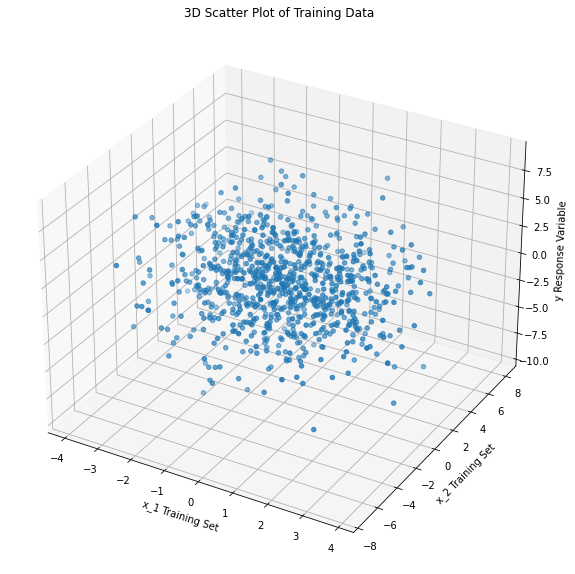

In [24]:
import matplotlib.pyplot as plt

training_fig = plt.figure(figsize=(10, 10))
training_plot = training_fig.add_subplot(projection='3d')
training_plot.scatter(x_1, x_2, t)
training_plot.set_title('3D Scatter Plot of Training Data')
training_plot.set_xlabel('x_1 Training Set')
training_plot.set_ylabel('x_2 Training Set')
training_plot.set_zlabel('y Response Variable')
plt.show()

Based purely on the scatterplot, there does not appear to be any observable pattern in the dataset. The values are seemingly random and must be compared directly with regression models to identify any potential existing patterns.

### Experiment 11: Create 3D surface plots of the models found in Experiments 3, 5, and 9.

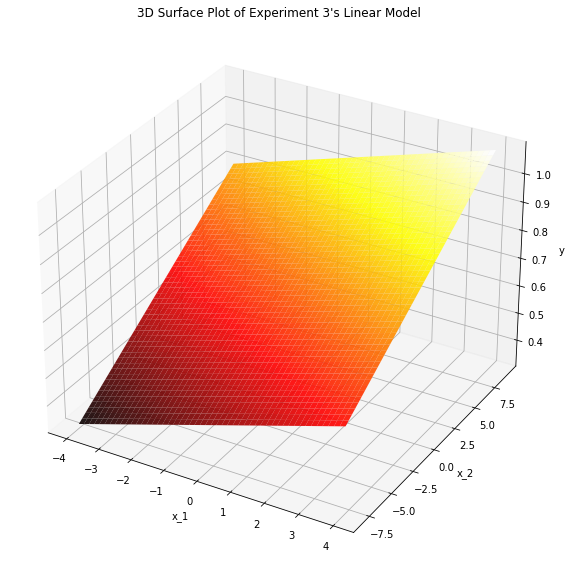

In [25]:
from matplotlib import cm

N = 50
x_vals = np.linspace(-4, 4, N)
y_vals = np.linspace(-8, 9, N)
X, Y = np.meshgrid(x_vals, y_vals)

# Experiment 3 model
Z1 = weight[0][0] + weight[1][0]*X + weight[2][0]*Y
exp3_fig = plt.figure(figsize=(10, 10))
exp3_plot = exp3_fig.add_subplot(projection='3d')
exp3_plot.plot_surface(X, Y, Z1, alpha=0.90, cmap=cm.hot)
exp3_plot.set_xlabel('x_1')
exp3_plot.set_ylabel('x_2')
exp3_plot.set_zlabel('y')
exp3_plot.set_title("3D Surface Plot of Experiment 3's Linear Model")
plt.show()

In Experiment 3, we used the training data to fit the following linear model:

$$y = 0.6933 + 0.0366x_1 + 0.0284x_2$$

The above 3D surface plot displays this model as a linear surface. Darker colors on the surface represent lower z-axis values. The $y$ values appear to increase as the values of $x_1$ and $x_2$ increase.

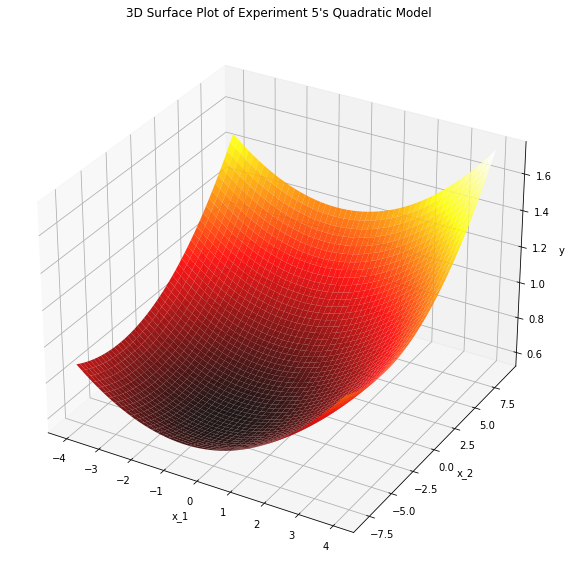

In [26]:
# Experiment 5 model
Z2 = w1[0][0] + w1[1][0]*X + w1[2][0]*Y + w1[3][0]*(X**2) + w1[4][0]*(Y**2)
exp5_fig = plt.figure(figsize=(10, 10))
exp5_plot = exp5_fig.add_subplot(projection='3d')
exp5_plot.plot_surface(X, Y, Z2, alpha=0.90, cmap=cm.hot)
exp5_plot.set_xlabel('x_1')
exp5_plot.set_ylabel('x_2')
exp5_plot.set_zlabel('y')
exp5_plot.set_title("3D Surface Plot of Experiment 5's Quadratic Model")
plt.show()

In Experiment 5, we used the training data to fit the following quadratic model:

$$y = 0.6147 + 0.0356x_1 + 0.0301x_2 + 0.0242x_1^2 + 0.0041x_2^2$$

The above 3D surface plot displays this model as a quadratic surface. Darker colors on the surface represent lower z-axis values. Just like the linear model, the $y$ values appear to increase as the values of $x_1$ and $x_2$ increase.

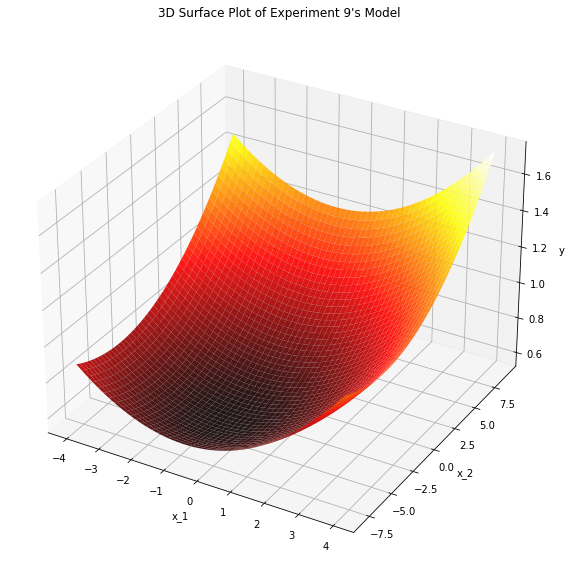

In [27]:
# Experiment 9 model
Z3 = Z2
exp9_fig = plt.figure(figsize=(10, 10))
exp9_plot = exp9_fig.add_subplot(projection='3d')
exp9_plot.plot_surface(X, Y, Z3, alpha=0.90, cmap=cm.hot)
exp9_plot.set_xlabel('x_1')
exp9_plot.set_ylabel('x_2')
exp9_plot.set_zlabel('y')
exp9_plot.set_title("3D Surface Plot of Experiment 9's Model")
plt.show()

In Experiment 9, we used the training set to fit the quadratic model displayed previously since the cross validation from Experiments 7 and 8 indicated that the training data fits best in a model of order 2. The above surface plot displays this model once more.

### Experiment 12: Create a plot using different colors to show the best fitting 3D surface from Experiment 11 and the scatterplot from Experiment 10.

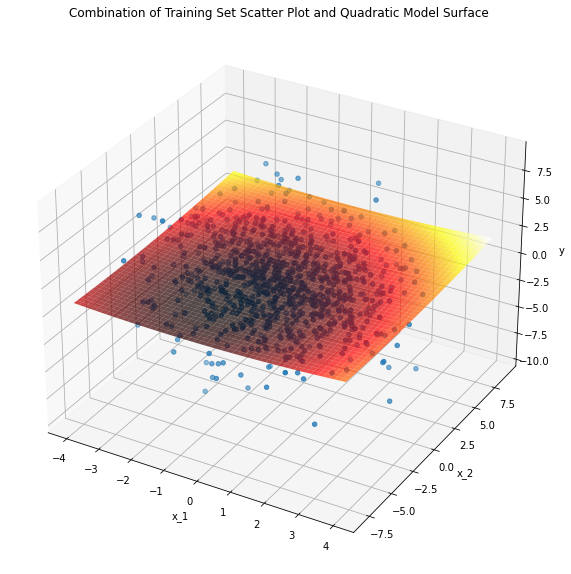

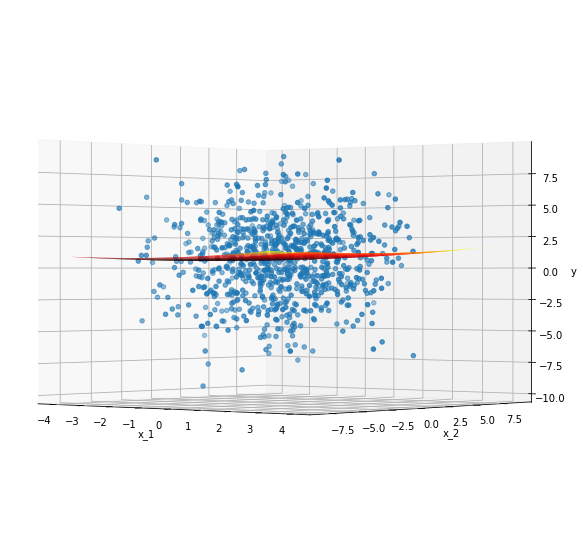

In [28]:
# Angle 1
combo_fig1 = plt.figure(figsize=(10, 10))
combo_plot1 = combo_fig1.add_subplot(projection='3d')
combo_plot1.plot_surface(X, Y, Z2, alpha=0.70, cmap=cm.hot)
combo_plot1.scatter(x_1, x_2, t)
combo_plot1.set_title('Combination of Training Set Scatter Plot and Quadratic Model Surface')
combo_plot1.set_xlabel('x_1')
combo_plot1.set_ylabel('x_2')
combo_plot1.set_zlabel('y')
plt.show()

# Angle 2
combo_fig2 = plt.figure(figsize=(10, 10))
combo_plot2 = combo_fig2.add_subplot(projection='3d')
combo_plot2.plot_surface(X, Y, Z2, cmap=cm.hot)
combo_plot2.scatter(x_1, x_2, t)
combo_plot2.set_xlabel('x_1')
combo_plot2.set_ylabel('x_2')
combo_plot2.set_zlabel('y')
combo_plot2.view_init(0, -50)
plt.show()

The above plots combine the training set scatter plot from Experiment 10 and the quadratic model surface from Experiment 11. Both plots display the same data but from different angles to better depict the locations of the scatter plot points relative to the quadratic surface.
As shown in the second plot, there appears to be a similar number of scatter plot points on both sides of the surface. This suggests a standard model was used (most likely quadratic or cubic) along with a slight offset (positive or negative) of approximately 8.0 to 9.0. This would explain the even spread of data above and below the curve while also having relatively consistent MSE values for lower order functions.